In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

train = pd.read_csv('./origin_data/train.csv')
train.drop(columns=['id'],inplace=True)
train = train.rename(columns = {'Num_H_Acceptors': 'Acceptors','Num_H_Donors': 'Donors','Num_RotatableBonds':'RotatableBonds'})
print(train.columns)
print(train.dtypes)
train.describe(include='all')
ecfp6 = pd.read_csv('./data/finger_ecfp6_train.csv').drop(columns=['id','SMILES', 'MLM', 'HLM', 'AlogP', 'Molecular_Weight', 'Num_H_Acceptors',
       'Num_H_Donors', 'Num_RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea'])


Index(['SMILES', 'MLM', 'HLM', 'AlogP', 'Molecular_Weight', 'Acceptors',
       'Donors', 'RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea'],
      dtype='object')
SMILES                         object
MLM                           float64
HLM                           float64
AlogP                         float64
Molecular_Weight              float64
Acceptors                       int64
Donors                          int64
RotatableBonds                  int64
LogD                          float64
Molecular_PolarSurfaceArea    float64
dtype: object


c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.3001956664147323


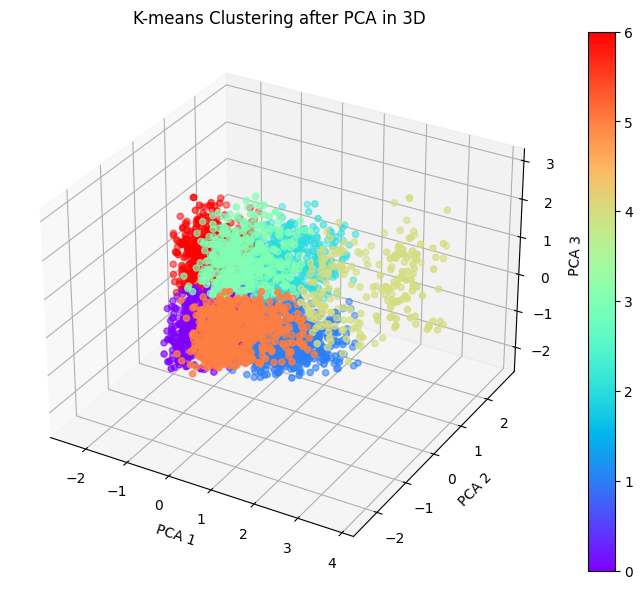

In [27]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA 변환
pca = PCA(n_components=3)
ecfp_pca = pca.fit_transform(ecfp6)

# K-means 클러스터링
cluster = 7
kmeans = KMeans(n_clusters=cluster) 
clusters = kmeans.fit_predict(ecfp_pca)

# 실루엣 점수 계산
score = silhouette_score(ecfp_pca, clusters)
print(f"Silhouette Score: {score}")

# 3차원 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ecfp_pca[:, 0], ecfp_pca[:, 1], ecfp_pca[:, 2], c=clusters, cmap='rainbow')

# 제목 및 레이블 설정
ax.set_title('K-means Clustering after PCA in 3D')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.colorbar(scatter)

plt.show()


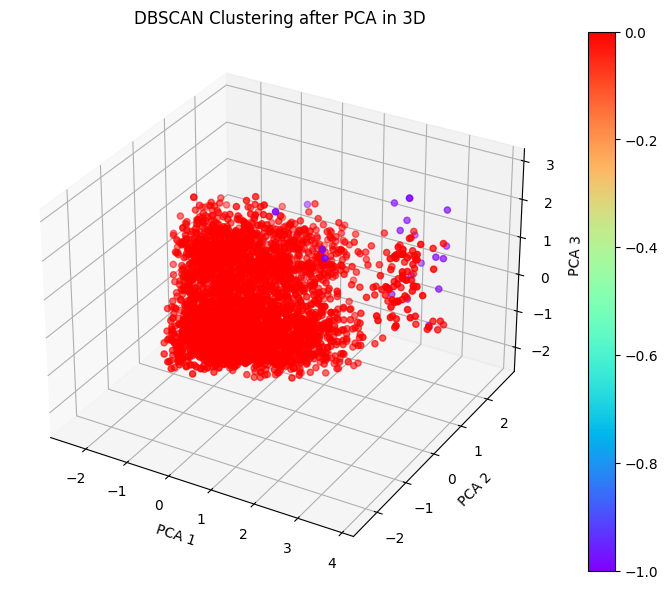

In [29]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA 변환
pca = PCA(n_components=3)
ecfp_pca = pca.fit_transform(ecfp6)

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps와 min_samples는 적절한 값으로 조정이 필요합니다.
clusters = dbscan.fit_predict(ecfp_pca)

# 실루엣 점수 계산 (노이즈 포인트 제외)
mask = clusters != -1



# 3차원 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ecfp_pca[:, 0], ecfp_pca[:, 1], ecfp_pca[:, 2], c=clusters, cmap='rainbow')

# 제목 및 레이블 설정
ax.set_title('DBSCAN Clustering after PCA in 3D')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.colorbar(scatter)

plt.show()


scale

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

mlm_df = train.drop(columns=['SMILES','HLM']).fillna(0)
hlm_df = train.drop(columns=['SMILES','MLM']).fillna(0)

mh_df = train.drop(columns=['SMILES','AlogP',	'Molecular_Weight',	'Acceptors',	'Donors',	'RotatableBonds',	'LogD',	'Molecular_PolarSurfaceArea']).fillna(0)

non_std = standard_scaler.fit_transform(mh_df)
mlm_std = standard_scaler.fit_transform(mlm_df)
mlm_mima = minmax_scaler.fit_transform(mlm_df)
hlm_std = standard_scaler.fit_transform(hlm_df)
hlm_mima = minmax_scaler.fit_transform(hlm_df)

mlm과 hlm없이 분포 파악

In [5]:

# PCA로 차원 축소 (2차원으로)
pca = PCA(n_components=2)
non_pca = pca.fit_transform(non_std)

c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5317847291530337


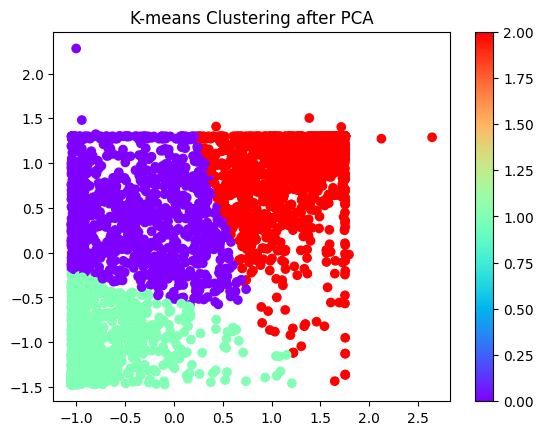

In [10]:
from sklearn.metrics import silhouette_score
# K-means 클러스터링
cluster = 3
kmeans = KMeans(n_clusters=cluster) 
clusters = kmeans.fit_predict(non_std)
# 실루엣 점수 계산
score = silhouette_score(non_std, clusters)
print(f"Silhouette Score: {score}")
# 클러스터별 인덱스 출력
for cluster_num in range(cluster):  
    indices_in_cluster = np.where(clusters == cluster_num)[0]
    indices_in_cluster = (indices_in_cluster+1).tolist()
    
# 결과 시각화
plt.scatter(non_std[:, 0], non_std[:, 1], c=clusters, cmap='rainbow')
plt.title('K-means Clustering after PCA')
plt.colorbar()
plt.show()


elbow method를 통한 최적의 클러스터 개수 탐색(MLM)

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 차원 축소 (2차원으로)
pca = PCA(n_components=2)
mlm_pca = pca.fit_transform(mlm_std)

c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

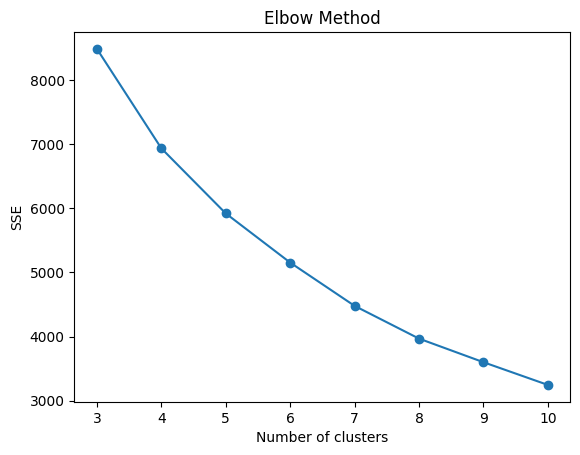

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 엘보우 방법
sse = []
for k in range(3, 11):  # 예를 들어 1부터 10까지의 클러스터 수를 시도
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mlm_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(3, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.3671286481056498


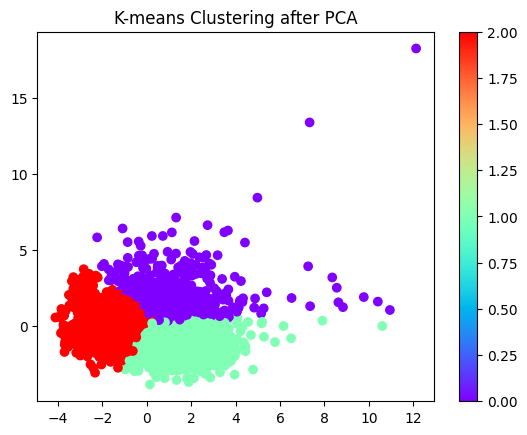

In [51]:
from sklearn.metrics import silhouette_score
# K-means 클러스터링
cluster = 3
kmeans = KMeans(n_clusters=cluster) 
clusters = kmeans.fit_predict(mlm_pca)
# 실루엣 점수 계산
score = silhouette_score(mlm_pca, clusters)
print(f"Silhouette Score: {score}")
# 클러스터별 인덱스 출력
for cluster_num in range(cluster):  
    indices_in_cluster = np.where(clusters == cluster_num)[0]
    indices_in_cluster = (indices_in_cluster+1).tolist()
    
# 결과 시각화
plt.scatter(mlm_pca[:, 0], mlm_pca[:, 1], c=clusters, cmap='rainbow')
plt.title('K-means Clustering after PCA')
plt.colorbar()
plt.show()


elbow method를 통한 최적의 클러스터 개수 탐색(HLM)

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 차원 축소 (2차원으로)
pca = PCA(n_components=2)
hlm_pca = pca.fit_transform(mlm_std)


c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

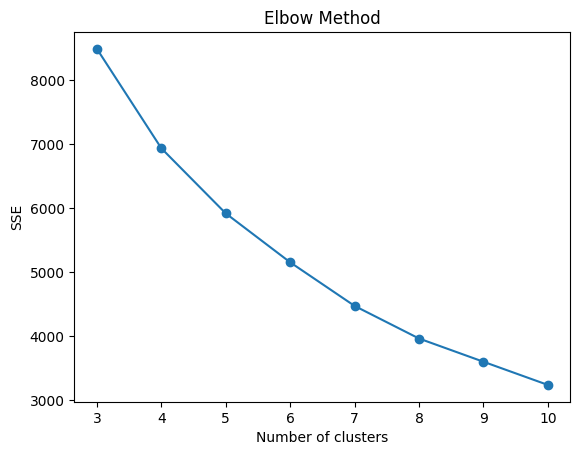

In [25]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 엘보우 방법
sse = []
for k in range(3, 11):  # 예를 들어 1부터 10까지의 클러스터 수를 시도
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(hlm_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(3, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


c:\ProgramData\anaconda3\envs\poum\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.36699087736254676


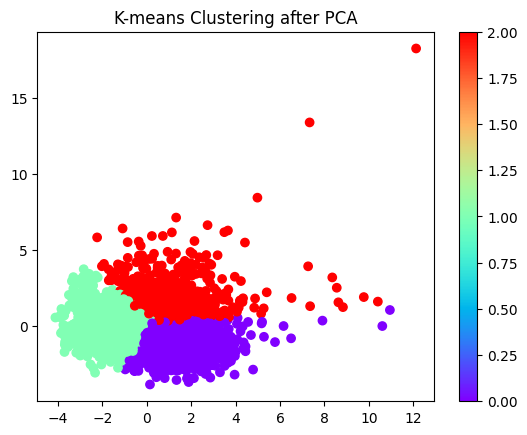

In [50]:
from sklearn.metrics import silhouette_score
# K-means 클러스터링
cluster = 3
kmeans = KMeans(n_clusters=cluster) 
clusters = kmeans.fit_predict(hlm_pca)
# 실루엣 점수 계산
score = silhouette_score(hlm_pca, clusters)
print(f"Silhouette Score: {score}")
# 클러스터별 인덱스 출력
for cluster_num in range(cluster):  
    indices_in_cluster = np.where(clusters == cluster_num)[0]
    indices_in_cluster = (indices_in_cluster+1).tolist()
    
# 결과 시각화
plt.scatter(hlm_pca[:, 0], hlm_pca[:, 1], c=clusters, cmap='rainbow')
plt.title('K-means Clustering after PCA')
plt.colorbar()
plt.show()


mlml,hlm 로그변환결과

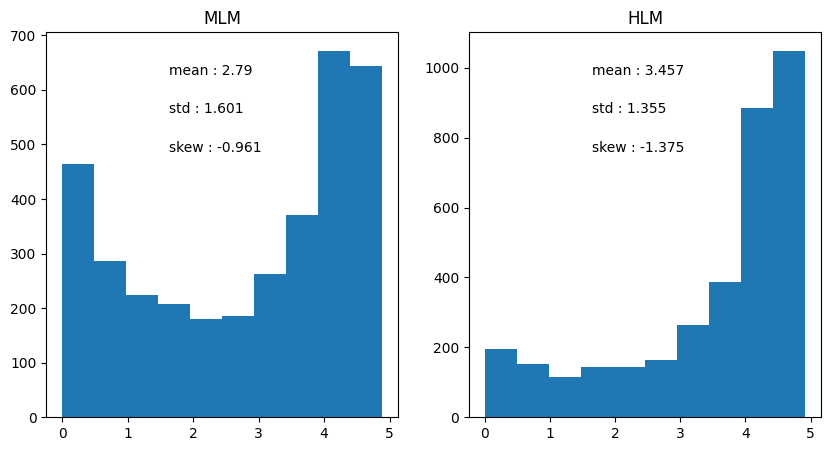

In [9]:
fig = plt.figure(figsize = (10, 5))
for i in range(1,3):
# mlm 칼럼의 백분위수를 기반으로 구간을 정의
    ax = plt.subplot(1, 2, i)
    target = np.log1p(train.iloc[:,i])
    mean = target.mean().round(3)
    std = target.std().round(3)
    skew = (3*(mean - np.median(target))/target.std()).round(3)
    mean = target.mean().round(3)
    std = target.std().round(3)
    plt.hist(target,bins=10,histtype='bar')
    plt.title(f"{train.columns[i]}")
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)


plt.show()